In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# read in all our data
df = pd.read_csv("datasets/NFL Play by Play 2009-2017 (v4).csv", index_col=0)

C:\Users\Eddy.Arias\AppData\Local\Temp\ipykernel_3576\2811780024.py:2: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("datasets/NFL Play by Play 2009-2017 (v4).csv", index_col=0)


In [20]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Visualizar las primeras filas del dataset
df.head()

,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,NaN,NaN,NaN,0,NaN,NaN,H.Ward,00-0017162,1,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,W.Parker,00-0022250,1,right,end,NaN,NaN,0,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,NaN,NaN,NaN,0,NaN,NaN,M.Wallace,00-0026901,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,NaN,0,NaN,NaN,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,0,NaN,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,NaN,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [42]:
print(df.isnull().sum())

df.isnull().sum().sum()


GameID           0
Drive            0
qtr              0
down         61154
time           224
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 101, dtype: int64


11505187

In [47]:
from sklearn.preprocessing import LabelEncoder
df_cleaned = df.copy()
# Aplicar Label Encoding a las columnas categóricas
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

In [49]:
# Crear un DataFrame que agrupe las columnas por tipo de datos
data_types_df = pd.DataFrame(df_cleaned.dtypes, columns=['Data Type'])

# Contar el número de columnas por tipo de dato
data_types_counts = data_types_df['Data Type'].value_counts().reset_index()
data_types_counts.columns = ['Data Type', 'Count']

data_types_counts


,Data Type,Count
0,int32,37
1,float64,33
2,int64,31


In [50]:
#Ver nulos
print(df_cleaned.isnull().sum())

df_cleaned.isnull().sum().sum()

GameID           0
Drive            0
qtr              0
down         61154
time           224
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 101, dtype: int64


11505187

In [51]:
# Imputar valores nulos con la media en las columnas numéricas
df_cleaned = df_cleaned.fillna(df_cleaned.mean())


In [53]:
print(df_cleaned.isnull().sum())

df_cleaned.isnull().sum().sum()

GameID      0
Drive       0
qtr         0
down        0
time        0
           ..
Win_Prob    0
WPA         0
airWPA      0
yacWPA      0
Season      0
Length: 101, dtype: int64


0

In [55]:
# Obtener el rango de valores (mínimo y máximo) de cada columna numérica
ranges = df_cleaned.select_dtypes(include=['float64', 'int64', 'int32']).agg(['min', 'max']).T
ranges['range'] = ranges['max'] - ranges['min']
pd.set_option('display.max_columns', None)
ranges

,min,max,range
GameID,2.009091e+09,2.017123e+09,8.032115e+06
Drive,1.000000e+00,3.500000e+01,3.400000e+01
qtr,1.000000e+00,5.000000e+00,4.000000e+00
down,1.000000e+00,4.000000e+00,3.000000e+00
time,0.000000e+00,9.010000e+02,9.010000e+02
...,...,...,...
Win_Prob,0.000000e+00,1.000000e+00,1.000000e+00
WPA,-9.972143e-01,9.948482e-01,1.992063e+00
airWPA,-9.998808e-01,9.948482e-01,1.994729e+00
yacWPA,-9.866730e-01,1.000000e+00,1.986673e+00


In [57]:
from sklearn.preprocessing import MinMaxScaler

# Instanciar el MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a todas las columnas
df_normalized = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)
df_normalized

,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,Interceptor,Rusher,Rusher_ID,RushAttempt,RunLocation,RunGap,Receiver,Receiver_ID,Reception,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,FieldGoalDistance,Fumble,RecFumbTeam,RecFumbPlayer,Sack,Challenge.Replay,ChalReplayResult,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,0.000000,0.000000,0.00,0.334159,0.998890,1.000000,1.000000,0.000000,0.945946,0.591837,0.295918,0.00,0.467742,0.0,0.290509,0.771429,0.942857,0.952865,0.0,0.653179,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.285714,1.000000,1.000000,0.0,1.0,1.000000,0.454545,0.473684,0.0,1.000000,0.0,1.0,1.000000,1.000000,0.0,1.000000,1.0,1.000000,1.000000,0.0,1.0,0.875231,1.0,0.668317,1.0,1.0,0.367267,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.500000,0.000000,0.794118,0.970588,0.0,1.000000,1.000000,1.000000,1.00,1.000000,1.00,0.001506,0.499057,0.211026,0.565813,0.214859,0.236700,0.343580,0.0,0.0,0.402424,0.674224,0.662212,0.577844,0.485675,0.514325,0.546433,0.453567,0.485675,0.531094,0.508849,0.491371,0.0
1,0.000000,0.000000,0.00,0.000000,0.991121,1.000000,0.998444,0.007423,0.783784,0.836735,0.581633,0.20,0.494624,0.0,0.000000,0.771429,0.942857,0.265819,0.0,0.456647,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.428571,0.136364,0.191617,1.0,0.0,0.666667,0.435065,0.520468,0.0,0.000000,0.0,1.0,1.000000,1.000000,0.0,1.000000,1.0,0.391775,0.020161,1.0,1.0,1.000000,1.0,0.170242,1.0,1.0,0.367267,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.500000,0.000000,0.794118,0.970588,0.0,1.000000,1.000000,1.000000,1.00,1.000000,1.00,0.000969,0.301256,0.033715,0.340361,0.295293,0.239678,0.463339,0.0,0.0,0.597297,0.590034,0.583338,0.642877,0.546433,0.453567,0.551088,0.448912,0.546433,0.502931,0.485097,0.515219,0.0
2,0.000000,0.000000,0.00,0.333333,0.950055,1.000000,0.990222,0.039236,0.783784,0.938776,0.530612,0.10,0.478495,0.0,0.000000,0.771429,0.942857,0.238091,0.0,0.410405,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.714286,1.000000,1.000000,0.0,1.0,1.000000,0.454545,0.473684,0.0,1.000000,0.0,1.0,0.978067,0.107477,1.0,0.666667,0.0,1.000000,1.000000,0.0,1.0,1.000000,1.0,0.888064,1.0,1.0,0.367267,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.500000,0.000000,0.794118,0.970588,0.0,1.000000,1.000000,1.000000,1.00,1.000000,1.00,0.001057,0.291818,0.031175,0.327541,0.306458,0.252100,0.461660,0.0,0.0,0.604833,0.525663,0.662212,0.577844,0.551088,0.448912,0.510793,0.489207,0.551088,0.480366,0.508849,0.491371,0.0
3,0.000000,0.000000,0.00,0.666667,0.904550,0.933333,0.981111,0.043478,0.783784,0.877551,0.561224,0.16,0.478495,0.0,0.000000,0.771429,0.942857,0.200467,0.0,0.427746,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.428571,0.136364,0.191617,1.0,0.5,0.333333,0.675325,0.473684,0.0,0.666667,0.0,1.0,1.000000,1.000000,0.0,1.000000,1.0,0.733766,0.338038,0.0,1.0,1.000000,1.0,1.000000,1.0,1.0,0.367267,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.500000,0.000000,0.794118,0.970588,0.0,1.000000,1.000000,1.000000,1.00,1.000000,1.00,0.001434,0.413931,0.061789,0.472556,0.290905,0.314721,0.348996,0.0,0.0,0.469135,0.512194,0.800554,0.380672,0.510793,0.489207,0.461217,0.538783,0.510793,0.47570

In [59]:
# Obtener el rango de valores (mínimo y máximo) de cada columna numérica
ranges = df_normalized.select_dtypes(include=['float64', 'int64', 'int32']).agg(['min', 'max']).T
ranges['range'] = ranges['max'] - ranges['min']
pd.set_option('display.max_columns', None)
ranges

,min,max,range
GameID,0.0,1.0,1.0
Drive,0.0,1.0,1.0
qtr,0.0,1.0,1.0
down,0.0,1.0,1.0
time,0.0,1.0,1.0
...,...,...,...
Win_Prob,0.0,1.0,1.0
WPA,0.0,1.0,1.0
airWPA,0.0,1.0,1.0
yacWPA,0.0,1.0,1.0


<Axes: >

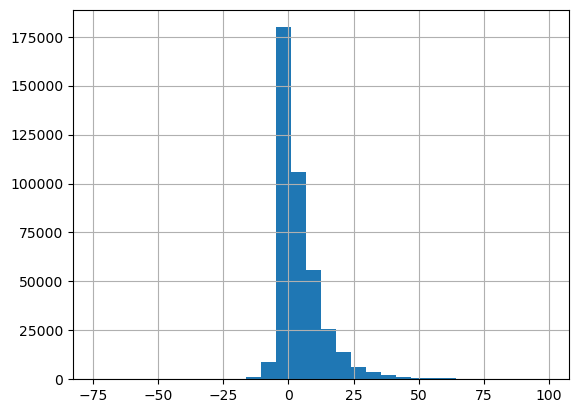

In [63]:
df_cleaned['Yards.Gained'].hist(bins=30)

In [72]:
def top_correlated_columns(df, target_column, top_n=10):
    """
    Esta función calcula las correlaciones de Pearson entre todas las columnas y la columna objetivo,
    y devuelve un nuevo DataFrame con las top_n columnas que tienen mejor correlación con la variable objetivo.

    :param df: DataFrame de pandas con los datos.
    :param target_column: La columna objetivo para calcular la correlación.
    :param top_n: El número de columnas con mayor correlación que quieres obtener (default es 10).
    :return: Un nuevo DataFrame con las top_n columnas con mayor correlación con la variable objetivo.
    """
    
    # Calcular la correlación de Pearson de todas las columnas con respecto a la columna objetivo
    correlation_matrix = df.corr()
    
    # Extraer las correlaciones con la variable objetivo y tomar el valor absoluto
    target_correlations = correlation_matrix[target_column].abs().drop(target_column)
    
    # Ordenar las correlaciones de mayor a menor
    top_correlations = target_correlations.sort_values(ascending=False).head(top_n)
    
    # Obtener los nombres de las columnas con mayor correlación
    top_columns = top_correlations.index.tolist()
    
    # Añadir la columna objetivo al DataFrame
    top_columns.append(target_column)
    
    # Crear un nuevo DataFrame con las columnas seleccionadas
    new_df = df[top_columns]
    
    return new_df

In [73]:
df_correlated = top_correlated_columns(df_normalized, 'Yards.Gained')

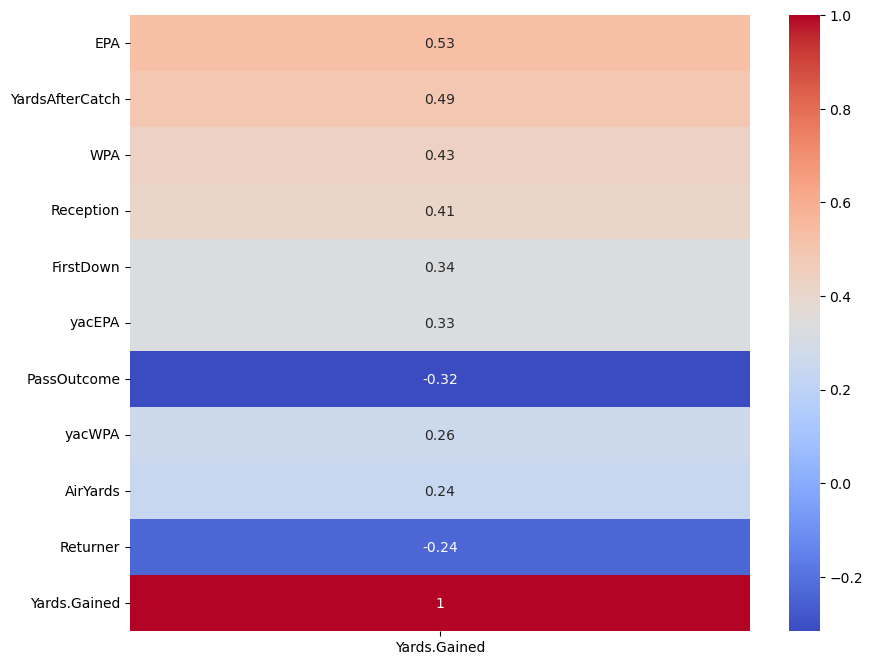

In [74]:


# Calcular la correlación de Pearson
correlation_matrix = df_correlated.corr()

# Mostrar las correlaciones con la variable objetivo 'Yards.Gained'
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix[['Yards.Gained']], annot=True, cmap='coolwarm')
plt.show()

In [75]:
df_correlated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   EPA              407688 non-null  float64
 1   YardsAfterCatch  407688 non-null  float64
 2   WPA              407688 non-null  float64
 3   Reception        407688 non-null  float64
 4   FirstDown        407688 non-null  float64
 5   yacEPA           407688 non-null  float64
 6   PassOutcome      407688 non-null  float64
 7   yacWPA           407688 non-null  float64
 8   AirYards         407688 non-null  float64
 9   Returner         407688 non-null  float64
 10  Yards.Gained     407688 non-null  float64
dtypes: float64(11)
memory usage: 34.2 MB


In [77]:

# Queremos predecir 'Yards.Gained'
y = df_correlated['Yards.Gained']

# Las características serán todas las demás columnas
X = df_correlated.drop('Yards.Gained', axis=1)

In [79]:
y

0         0.653179
1         0.456647
2         0.410405
3         0.427746
4         0.427746
            ...   
407683    0.427746
407684    0.427746
407685    0.502890
407686    0.421965
407687    0.427746
Name: Yards.Gained, Length: 407688, dtype: float64

In [80]:
X

,EPA,YardsAfterCatch,WPA,Reception,FirstDown,yacEPA,PassOutcome,yacWPA,AirYards,Returner
0,0.674224,0.473684,0.531094,0.0,0.290509,0.577844,1.0,0.491371,0.454545,0.875231
1,0.590034,0.520468,0.502931,1.0,0.000000,0.642877,0.0,0.515219,0.435065,1.000000
2,0.525663,0.473684,0.480366,0.0,0.000000,0.577844,1.0,0.491371,0.454545,1.000000
3,0.512194,0.473684,0.475707,0.0,0.000000,0.380672,0.5,0.418003,0.675325,1.000000
4,0.677847,0.473684,0.549645,0.0,1.000000,0.577844,1.0,0.491371,0.454545,1.000000
...,...,...,...,...,...,...,...,...,...,...
407683,0.586647,0.473684,0.500594,0.0,0.000000,0.577844,1.0,0.491371,0.454545,1.000000
407684,0.571830,0.473684,0.485569,0.0,0.000000,0.577359,0.5,0.492551,0.532468,1.000000
407685,0.592729,0.491228,0.490756,1.0,1.000000,0.698524,0.0,0.502186,0.519481,1.000000
407686,0.586647,0.473684,0.516096,0.0,0.000000,0.577844,1.0,0.491371,0.454545,1.000000


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [83]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Cuadrático Medio (MSE): 0.0013231131100044195
Coeficiente de Determinación (R²): 0.5301694196077723


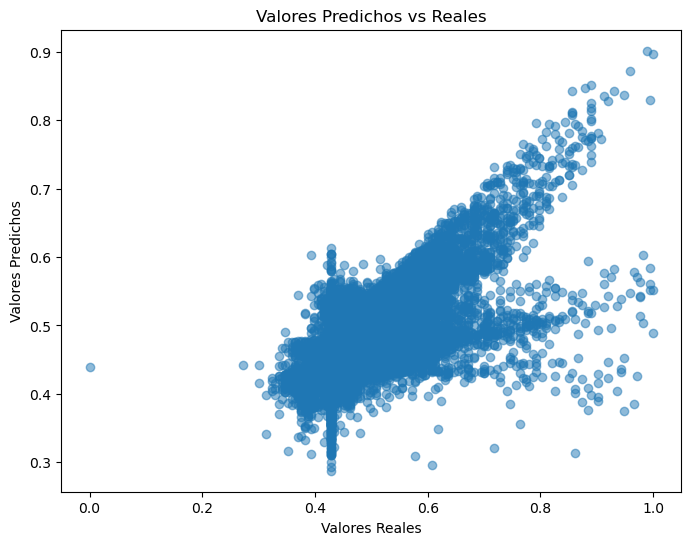

In [84]:
# Gráfico de dispersión para ver la relación entre las predicciones y los valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Predichos vs Reales")
plt.show()

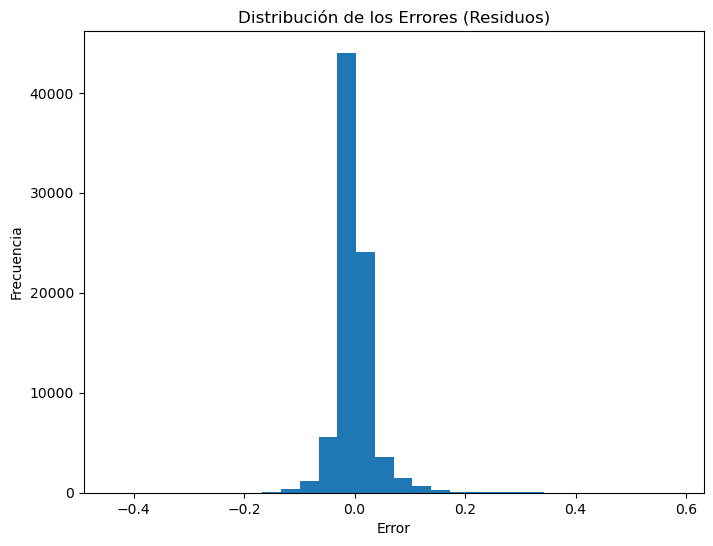

In [85]:
# Calcular los errores (residuos)
errors = y_test - y_pred

# Crear un histograma de los errores
plt.figure(figsize=(8,6))
plt.hist(errors, bins=30)
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores (Residuos)")
plt.show()